In [1]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
%matplotlib inline

from datetime import date, datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from alg import *
from utils import *

In [2]:
num_resources = 3
processing_times = [5, 5, 4, 4, 3, 3, 3]

schedule, makespan, approx_factor = lpt(R=num_resources, p=processing_times)
makespan, approx_factor

(11.0, 1.4444444444444444)

In [3]:
gantt_df = gantt(R=num_resources, p=processing_times, s=schedule)
gantt_df

,task,start,finish,resource
0,0,0.0,5.0,0
1,4,5.0,8.0,0
2,6,8.0,11.0,0
3,1,0.0,5.0,1
4,5,5.0,8.0,1
5,2,0.0,4.0,2
6,3,4.0,8.0,2


In [4]:
suboptimal_instance(R=3)

[5, 5, 4, 4, 3, 3, 3]

In [5]:
list(generate_subopt_instances(5))

[(0, [0]),
 (1, [1, 1, 1]),
 (2, [3, 3, 2, 2, 2]),
 (3, [5, 5, 4, 4, 3, 3, 3]),
 (4, [7, 7, 6, 6, 5, 5, 4, 4, 4])]

In [6]:
def evaluate_approx_factors(num_instances, generator):
    return pd.Series([lpt(R, p)[2] for R, p in generator(num_instances)])

In [7]:
rs = evaluate_approx_factors(num_instances=250, generator=generate_subopt_instances)
rs.head()

0         NaN
1    1.666667
2    1.500000
3    1.444444
4    1.416667
dtype: float64

<AxesSubplot:xlabel='#resources', ylabel='approx. factor'>

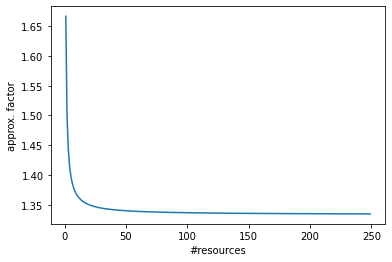

In [8]:
rs.plot.line(xlabel='#resources', ylabel='approx. factor')

In [9]:
rs.min()

1.3346720214190093

In [10]:
random_instance(n=10, high=10)

[1, 6, 2, 8, 8, 7, 2, 4, 4, 4]

In [11]:
list(generate_random_instances(5, 10))

[(0, []), (1, [3]), (2, [9, 3]), (3, [6, 1, 2]), (4, [6, 1, 6, 8])]

In [12]:
def evaluate_random_factors(num_instances, R):
    return pd.Series(lpt(R, p)[2] for n, p in generate_random_instances(m=num_instances))

In [13]:
r_df = pd.DataFrame({f'R={R}': evaluate_random_factors(num_instances=250, R=R) for R in range(2, 7)})
r_df.head()

,R=2,R=3,R=4,R=5,R=6
0,1.00,1.000000,1.00,1.0,1.000000
1,2.50,2.333333,2.25,2.2,2.166667
2,2.50,2.333333,2.25,2.2,2.166667
3,1.75,2.333333,2.25,2.2,2.166667
4,1.75,1.666667,2.25,2.2,2.166667


<AxesSubplot:xlabel='#tasks', ylabel='approx. factor'>

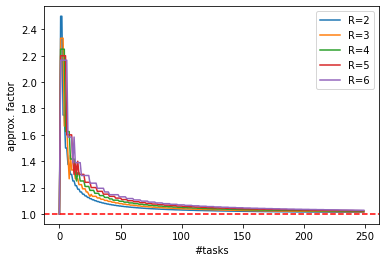

In [14]:
ax = r_df.plot.line(xlabel='#tasks', ylabel='approx. factor')
ax.axhline(y=1, color='r', linestyle='--')
ax

In [15]:
r_df.min()

R=2    1.0
R=3    1.0
R=4    1.0
R=5    1.0
R=6    1.0
dtype: float64